#Deep learning

RNN (Recurrent Neural Network )using stock exchange dataset from Embraer S.A. (EMBR3.SA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn


In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import keras
print("Keras version:", keras.__version__)

TensorFlow version: 2.17.0
Keras version: 3.4.1


In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler

In [25]:
base = pd.read_csv('EMBR3.SA.csv')

In [26]:
base

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-15,18.360001,18.459999,17.820000,18.049999,18.049999,3168500
1,2019-08-16,18.100000,18.309999,17.990000,18.000000,18.000000,2403300
2,2019-08-19,18.030001,18.280001,17.850000,17.950001,17.950001,3333100
3,2019-08-20,18.049999,18.070000,17.670000,18.000000,18.000000,1806700
4,2019-08-21,18.200001,18.200001,17.809999,18.139999,18.139999,1792300
...,...,...,...,...,...,...,...
1239,2024-08-08,39.889999,42.220001,39.000000,41.939999,41.939999,16767800
1240,2024-08-09,42.369999,43.259998,41.209999,43.250000,43.250000,10542800
1241,2024-08-12,43.250000,44.439999,42.630001,43.500000,43.500000,6368900
1242,2024-08-13,44.189999,45.560001,43.799999,43.900002,43.900002,7301500


In [27]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1244 non-null   object 
 1   Open       1244 non-null   float64
 2   High       1244 non-null   float64
 3   Low        1244 non-null   float64
 4   Close      1244 non-null   float64
 5   Adj Close  1244 non-null   float64
 6   Volume     1244 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.2+ KB


In [28]:
# convert the 'Date' column to datetime objects
base['Date'] = pd.to_datetime(base['Date'])

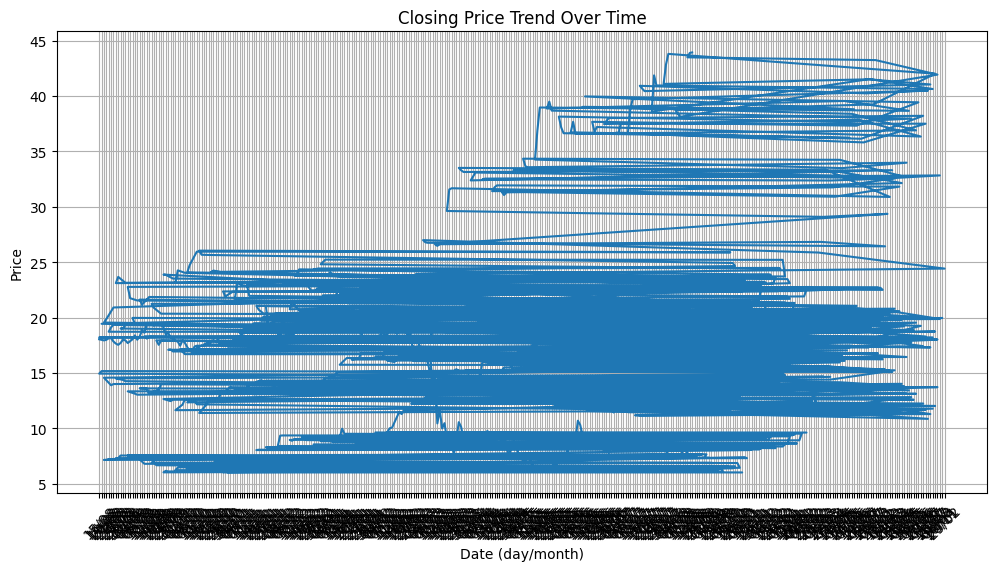

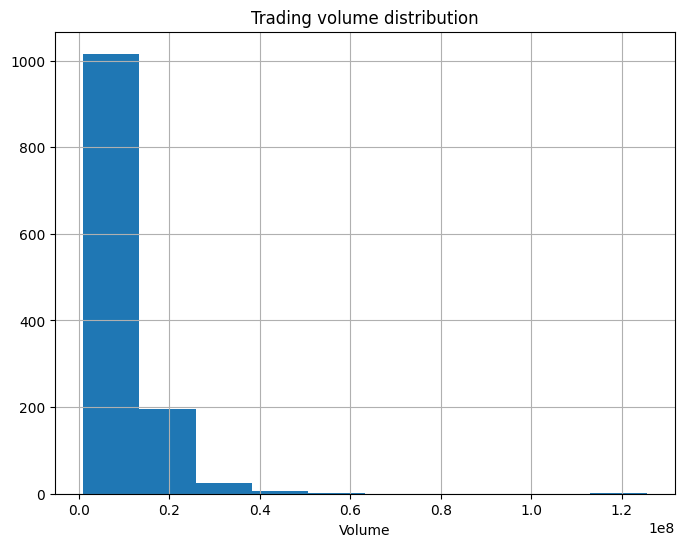

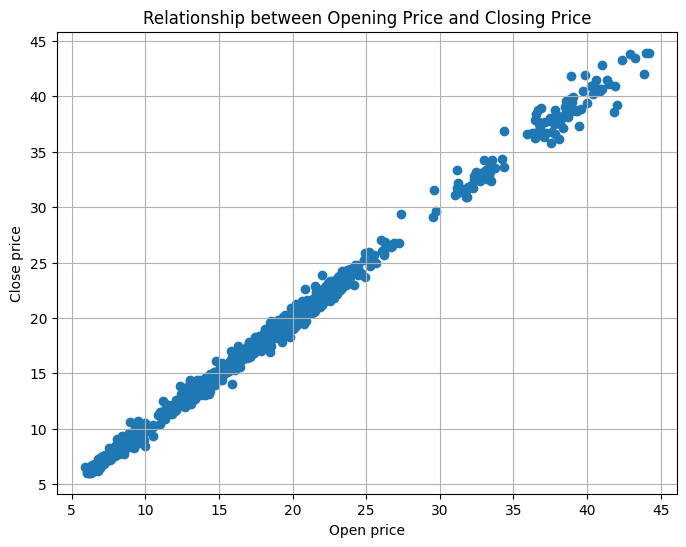

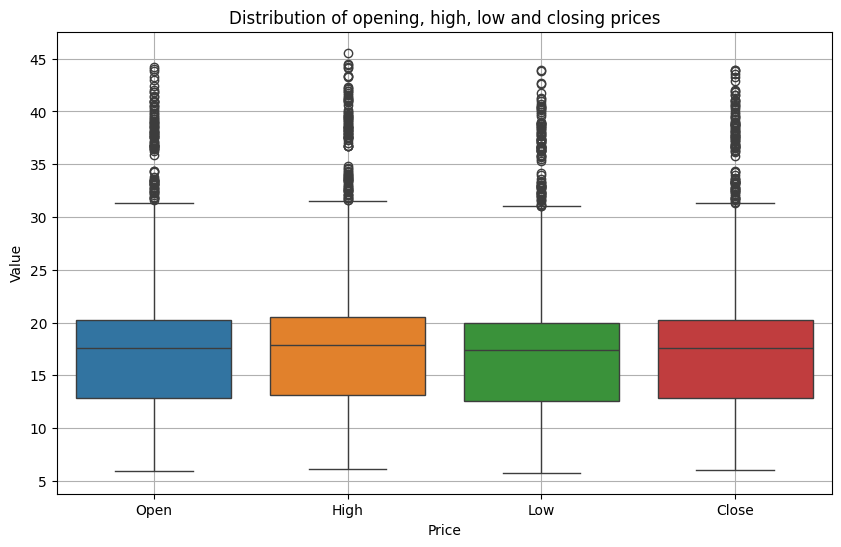

In [29]:
import seaborn as sns

# line chart to  visualize closing price trend over time
plt.figure(figsize=(12, 6))
plt.plot(base['Date'].dt.strftime('%d/%m'), base['Close'])
plt.xlabel('Date (day/month)')
plt.ylabel('Price')
plt.title('Closing Price Trend Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Histogram to visualize trading volume distribution
plt.figure(figsize=(8, 6))
plt.hist(base['Volume'], bins=10)
plt.xlabel('Volume')
plt.title('Trading volume distribution')
plt.grid(True)
plt.show()

# Gráfico de dispersão para visualizar a relação entre o preço de abertura e o preço de fechamento
plt.figure(figsize=(8, 6))
plt.scatter(base['Open'], base['Close'])
plt.xlabel('Open price')
plt.ylabel('Close price')
plt.title('Relationship between Opening Price and Closing Price')
plt.grid(True)
plt.show()

# Boxplot to visualize the distribution of opening, high, low and closing prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=base[['Open', 'High', 'Low', 'Close']])
plt.xlabel('Price')
plt.ylabel('Value')
plt.title('Distribution of opening, high, low and closing prices')
plt.grid(True)
plt.show()


In [30]:
base.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [31]:
base.shape

(1244, 7)

In [34]:
base.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-15,18.360001,18.459999,17.820000,18.049999,18.049999,3168500
1,2019-08-16,18.100000,18.309999,17.990000,18.000000,18.000000,2403300
2,2019-08-19,18.030001,18.280001,17.850000,17.950001,17.950001,3333100
3,2019-08-20,18.049999,18.070000,17.670000,18.000000,18.000000,1806700
4,2019-08-21,18.200001,18.200001,17.809999,18.139999,18.139999,1792300


In [35]:
base.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1244,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1.244000e+03
mean,2022-02-15 08:22:22.765273088,17.590096,17.929558,17.255949,17.589381,17.589381,9.454150e+06
min,2019-08-15 00:00:00,5.910000,6.080000,5.770000,6.030000,6.030000,8.888000e+05
25%,2020-11-12 18:00:00,12.807500,13.170000,12.542500,12.840000,12.840000,5.228775e+06
50%,2022-02-16 12:00:00,17.590000,17.889999,17.355001,17.549999,17.549999,7.847450e+06
75%,2023-05-18 06:00:00,20.242500,20.530001,19.932500,20.230000,20.230000,1.163992e+07
max,2024-08-14 00:00:00,44.189999,45.560001,43.900002,43.939999,43.939999,1.254731e+08
std,NaN,7.571557,7.694391,7.466764,7.596757,7.596757,7.232904e+06


In [53]:
# convertion to array
# x_train_open
base_open = base.iloc[:,1:2].values
base.iloc[:,1:2].values

array([[18.360001],
       [18.1     ],
       [18.030001],
       ...,
       [43.25    ],
       [44.189999],
       [44.029999]])

In [54]:
normalizer = MinMaxScaler()
base_open_norm = normalizer.fit_transform(base_open)
base_open_norm[0:10]

array([[0.32523514],
       [0.31844306],
       [0.31661445],
       [0.31713687],
       [0.32105542],
       [0.32079418],
       [0.31896555],
       [0.3140021 ],
       [0.30485894],
       [0.30198535]])

In [55]:
base_open_norm.shape

(1244, 1)

In [67]:
# Separate an array with unique prices, and another array set for 30 days
x = np.array([base_open_norm[i-30:i, 0] for i in range(30, len(base_open_norm))])
y = base_open_norm[30:, 0]

In [70]:
x[0:5]

array([[0.32523514, 0.31844306, 0.31661445, 0.31713687, 0.32105542,
        0.32079418, 0.31896555, 0.3140021 , 0.30485894, 0.30198535,
        0.30825495, 0.31818183, 0.31583073, 0.31060604, 0.31452459,
        0.31896555, 0.32863115, 0.31713687, 0.32601879, 0.33908044,
        0.3377743 , 0.35475445, 0.35501568, 0.349791  , 0.34874609,
        0.35475445, 0.35501568, 0.349791  , 0.34508885, 0.32810866],
       [0.31844306, 0.31661445, 0.31713687, 0.32105542, 0.32079418,
        0.31896555, 0.3140021 , 0.30485894, 0.30198535, 0.30825495,
        0.31818183, 0.31583073, 0.31060604, 0.31452459, 0.31896555,
        0.32863115, 0.31713687, 0.32601879, 0.33908044, 0.3377743 ,
        0.35475445, 0.35501568, 0.349791  , 0.34874609, 0.35475445,
        0.35501568, 0.349791  , 0.34508885, 0.32810866, 0.32993734],
       [0.31661445, 0.31713687, 0.32105542, 0.32079418, 0.31896555,
        0.3140021 , 0.30485894, 0.30198535, 0.30825495, 0.31818183,
        0.31583073, 0.31060604, 0.31452459, 0.

In [73]:
print(x.shape)
print(y.shape)
x.shape[1]

(1214, 30)
(1214,)


30

In [75]:
# input_shape number previus days to predict
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences=True, input_shape = (x.shape[1], 1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = 'linear'))
regressor.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 30, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 30, 50)              │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 30, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,451 (435.36 KB)

 Trainable params: 111,451 (435.36 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
regressor.fit(x, y, epochs = 100, batch_size= 15)

Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - loss: 0.0016 - mean_absolute_error: 0.0286
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0012 - mean_absolute_error: 0.0247
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0014 - mean_absolute_error: 0.0260
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0014 - mean_absolute_error: 0.0262
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0013 - mean_absolute_error: 0.0251
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0016 - mean_absolute_error: 0.0280
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0014 - mean_absolute_error: 0.0262
Epoch 8/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 0.0011 - mean_absolute_error: 0.0241
Epoch 9/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - loss: 0.0012 - mean_absolute_error: 0.0250
Epoch 10/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0013 - mean_absolute_error: 0.0253
Epoch 11/100
81/81 ━━━━━━━━

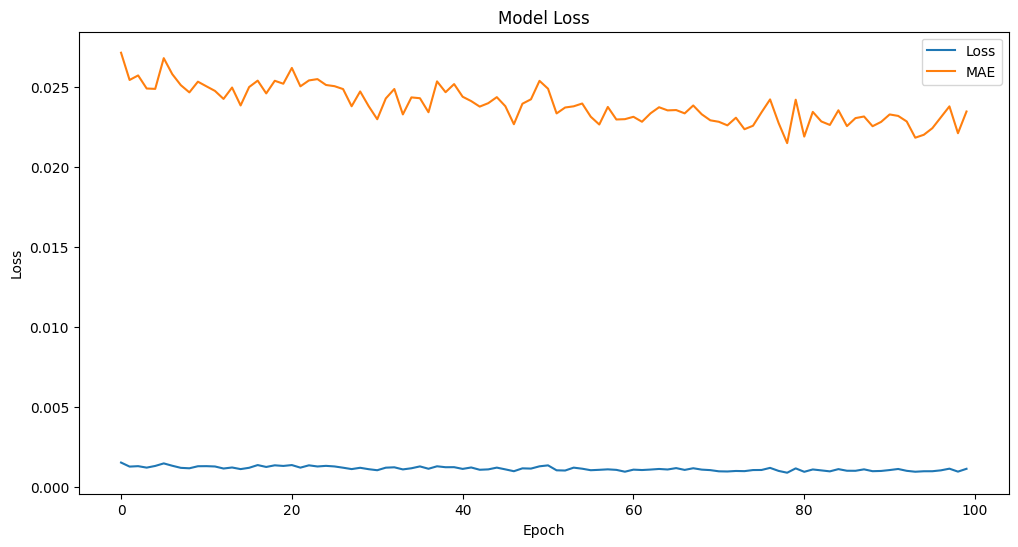

In [92]:
# Plotar o gráfico de loss
plt.figure(figsize=(12, 6))
plt.plot(regressor.history.history['loss'], label='Loss')
plt.plot(regressor.history.history['mean_absolute_error'], label='MAE')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()